# Homework 3

## Matthew Lim - sl4500

### Due: Friday Dec 4th @ 11:59pm

In this homework we will be performing 

- feature cleaning and engineering

- dimensionality reduction

## Instructions

Follow the comments below and fill in the blanks (\_\_\_\_) to complete.

Please 'Restart and Run All' prior to submission.

Where not specified, please run functions with default argument settings.

Out of 60 points total.

# Part 0: Environment Setup

In [1]:
# 0. (1pt) Set up our environment with comman libraries and plotting.
#    Note: generally we would do all of our imports here but some imports
#    have been left till later where they are used.

# Import numpy, pandas, matplotlib.pyplot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Execute the matplotlib magic function to display plots inline
%matplotlib inline

# Part 1: Data Cleaning and Feature Selection

In this section we will be loading, cleaning and transforming a small set of data related to loan applications.

There are two files, one containing loan application information and the other containing borrower information.

You will need to load both files, join them and then transform this data, creating a new dataframe with features which could then be used for modeling.

Each step is followed by a print or plot of some kind to help us catch errors as they happen instead of later in the pipeline.

### Data Preparation and Exploration

In [2]:
# 1. (2pts) Load Loan Application Data

# Read in the first dataframe containing loan application information.
# The path to the datafile is '../data/hw3_loan.csv'.
# Use the appropriate pandas command to read a csv file.
# 'CustomerID' is a unique id that should be set as the index using the index_col argument.
# Store this dataframe as df_loan.
df_loan = pd.read_csv('../data/hw3_loan.csv', index_col = 'CustomerID')

# Print the .info() of df_loan and check the size (should be 633 rows, 4 columns)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   WasTheLoanApproved        663 non-null    object
 1   LoanReason                663 non-null    object
 2   LoanPayoffPeriodInMonths  663 non-null    int64 
 3   RequestedAmount           663 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 25.9+ KB


In [3]:
# 2. (2pts) Load Borrower Data

# Read in the first dataframe containing borrower information.
# The path to the datafile is '../data/hw3_borrower.csv'.
# Use the appropriate pandas command to read a csv file.
# 'CustomerID' is a unique id that should be set as the index using the index_col argument.
# Store this dataframe as df_borrower.
df_borrower = pd.read_csv('../data/hw3_borrower.csv', index_col = 'CustomerID')

# Print the .info() of df_borrower (should be 633 rows, 2 columns)
df_borrower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     585 non-null    float64
 1   YearsAtCurrentEmployer  542 non-null    object 
dtypes: float64(1), object(1)
memory usage: 15.5+ KB


In [4]:
# 3. (2pts) Join Datasets

# Join the df_loan and df_borrower and store as df_joined.
# Perform an inner join.
# Note that since both dataframes share an index, it is convenient to use the 'join()' function.
df_joined = df_loan.join(df_borrower, how = 'inner')

# Print df information summary using 'info'
# There should still be 663 rows but now 6 columns
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WasTheLoanApproved        663 non-null    object 
 1   LoanReason                663 non-null    object 
 2   LoanPayoffPeriodInMonths  663 non-null    int64  
 3   RequestedAmount           663 non-null    int64  
 4   Age                       585 non-null    float64
 5   YearsAtCurrentEmployer    542 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 56.3+ KB


In [5]:
# 4. (1pt) LoanReason

# "LoanReason" is a categorical variable in df_joined.
# Print the counts of each category using 'value_counts'
df_joined['LoanReason'].value_counts()

goods     312
auto      217
other      90
school     44
Name: LoanReason, dtype: int64

In [6]:
# 5. (2pts) Transform LoanReason Using One-Hot Encoding

# Transform just the LoanReason column into one-hot encoding using 'pd.get_dummies()'.
# Use prefix='LoanReason' to prefix the column names get_dummies().
# Leave all other arguments at defaults.
# Store the resulting dataframe as df_loanreason
df_loanreason = pd.get_dummies(df_joined['LoanReason'], prefix= 'LoanReason')

# Display the first 3 rows of df_loanreason to confirm the transformation.
df_loanreason[:3]

,LoanReason_auto,LoanReason_goods,LoanReason_other,LoanReason_school
CustomerID,,,,
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0


In [7]:
# 6. (2pts) Create Transformed Feature Dataframe

# We are performing these transformations in order to use this data for modelling.
#
# Instead of adding transformed features into our original dataframe (df_joined)
#   it is useful to create a new dataframe containing only features used for modeling.

# Create this new dataframe df_features by copying df_loanreason into df_features using .copy().
df_features = df_loanreason.copy()

# Print df_features information summary using 'info'
# We should see the 4 columns created for LoanReason
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   LoanReason_auto    663 non-null    uint8
 1   LoanReason_goods   663 non-null    uint8
 2   LoanReason_other   663 non-null    uint8
 3   LoanReason_school  663 non-null    uint8
dtypes: uint8(4)
memory usage: 27.8 KB


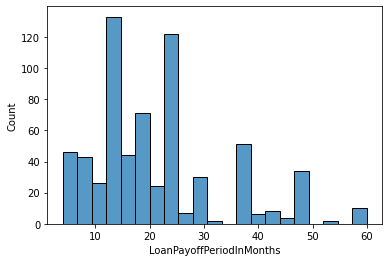

In [8]:
# 7. (1pt) LoanPayoffPeriodInMonths

# Use seaborn histplot to plot df_joined.LoanPayoffPeriodInMonths using default settings.
# Note that there appear to be several modes in the data corresponding to years.
sns.histplot(x=df_joined.LoanPayoffPeriodInMonths);

In [9]:
# 8. (1pt) Create Period Bins

# We'll bin LoanPayoffPeriodInMonths into [less than 1 year, 1 up to 2 years, 2 or more years]
# Create a list with four values
#   minimum value in LoanPayoffPeriodInMonths
#   12
#   24
#   maximum value of LoanPayoffPeriodInMonths
# Store this list as 'period_bins'
period_bins = [df_joined.LoanPayoffPeriodInMonths.min(), 12, 24, df_joined.LoanPayoffPeriodInMonths.max()]

# Print period_bins.
period_bins

[4, 12, 24, 60]

In [10]:
# 9. (3pts) Bin LoanPayoffPeriodInMonths

# Use pd.cut() to bin LoanPayoffPeriodInMonths.
# Use the period_bins list we created above for the bin edges.
# Set include_lowest to True to include the minimum value in the first bin.
# Set the bin labels as ['0','1','2+'].
# Store as loanperiod_years
loanperiod_years = pd.cut(df_joined.LoanPayoffPeriodInMonths,
                          bins = period_bins, 
                          labels = ['0', '1', '2+'],
                          include_lowest = True)

# loanperiod_years is a Series.
# Print the number of items in each bin of loanperiod_years using .value_counts().
# Sort by the index labels (the bin labels) by calling .sort_index() on the result of .value_counts()
loanperiod_years.value_counts().sort_index()

0     241
1     268
2+    154
Name: LoanPayoffPeriodInMonths, dtype: int64

In [11]:
# 10. (2pts) Transform Period Year Bins using One-Hot Encoding

# Use 'pd.get_dummies' to encode loanperiod_years.
# Use prefix 'LoanPeriodYears'.
# Store as df_loanperiod.
df_loanperiod = pd.get_dummies(loanperiod_years, prefix= 'LoanPeriodYears')

# Display the first 3 rows of df_loanperiod to confirm the transformation.
df_loanperiod[:3]

,LoanPeriodYears_0,LoanPeriodYears_1,LoanPeriodYears_2+
CustomerID,,,
2,1,0,0
3,1,0,0
4,1,0,0


In [12]:
# 11. (2pts) Extend Transformed Features

# Join the existing df_features dataframe with df_loanperiod.
# Note that they share an index, so use .join() here.
# Store the result back into df_features.
df_features = df_features.join(df_loanperiod)

# Print df_features information summary using 'info'.
# Note that the new columns have been joined.
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   LoanReason_auto     663 non-null    uint8
 1   LoanReason_goods    663 non-null    uint8
 2   LoanReason_other    663 non-null    uint8
 3   LoanReason_school   663 non-null    uint8
 4   LoanPeriodYears_0   663 non-null    uint8
 5   LoanPeriodYears_1   663 non-null    uint8
 6   LoanPeriodYears_2+  663 non-null    uint8
dtypes: uint8(7)
memory usage: 29.7 KB


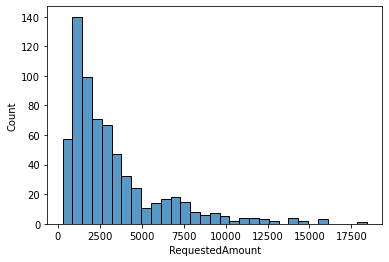

In [13]:
# 12. (1pt) RequestedAmount

# Use seaborn histplot to plot df_joined.RequestedAmount using default settings.
# Note that this features is right skewed and has a very wide range.
sns.histplot(x=df_joined.RequestedAmount);

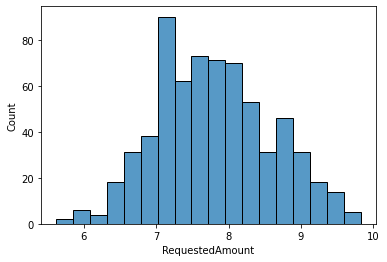

In [14]:
# 12. (2pts) Log Transform RequestedAmount

# Using the .apply(), apply np.log to the RequestedAmount column.
# Store the result as requestedamount_log
requestedamount_log = df_joined.RequestedAmount.apply(np.log)

# Use seaborn histplot to plot requestedamount_log using default settings.
# Note that the shape is is closer to a normal distribution
sns.histplot(x=requestedamount_log);

In [15]:
# 13. (3pts) Center and Scale log(RequestedAmount) Manually

# Standardize requestedamount_log by 
#   subtracting the mean of the series and dividing by the standard deviation of the series.
# Store the result into df_features as column 'RequestedAmount_log_scaled'
df_features['RequestedAmount_log_scaled'] = (requestedamount_log - requestedamount_log.mean() )/ requestedamount_log.std()

# Confirm that scaling has been applied properly by printing out 
# the mean and std. dev. of RequestedAmount_log_scaled
print(df_features['RequestedAmount_log_scaled'].mean(), df_features['RequestedAmount_log_scaled'].std())

1.9290753007061544e-16 1.0


In [16]:
# 14. (2pts) Age

# The df_joined.Age variable has missing values.
# Before we fill the missing values, create a dummy column noting where data is missing.
# We want to store this as an int instead of a boolean.
# Use .isna().astype(int) on the Age column to both find nulls and convert boolean to int.
# Store in df_features as 'Age_missing'.
df_features['Age_missing'] = df_joined.Age.isna().astype(int)

# Print the number of 0s and 1s in Age_missing using .value_counts().
df_features['Age_missing'].value_counts()

0    585
1     78
Name: Age_missing, dtype: int64

In [17]:
# 15. (2pts) Fill Age with Median

# Age may be skewed so fill missing values using median instead of mean.
# Use fillna() with A to fill the missing values in Age with the median of Age.
# Store back into df_joined['Age_filled']
df_joined['Age_filled'] = df_joined.Age.fillna(df_joined.Age.median())

# Use assert and the sum of .isna() to check that there are no missing values in Age_filled
assert df_joined.Age_filled.isna().sum() == 0

In [18]:
# 16. (3pts) Center and Scale Age Using StandardScaler

# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Using StandardScaler and fit_transform, standardize the Age_filled column.
# Note that fit_transform expects a DataFrame not a Series.
# Use dfjoined[['Age_filled']] to return a DataFrame.
# Store the result in df_features as 'Age_scaled'
# NOTE: while there are other transformations we might apply to Age (eg log) we'll skip them in this homework
df_features['Age_scaled'] = StandardScaler().fit_transform(pd.DataFrame(df_joined.Age_filled))

# Print out the mean and standard deviation of Age_scaled with a precision of 2
print(f'Age_scaled mean: {df_features.Age_scaled.mean():0.2f}')
print(f'Age_scaled std:  {df_features.Age_scaled.std():0.2f}')

Age_scaled mean: 0.00
Age_scaled std:  1.00


In [19]:
# 17. (1pt) YearsAtCurrentEmployer

# There are missing values in df_joined.YearsAtCurrentEmployer as well.
# NOTE: Normally we would want to capture the missing values using a dummy column first.
#       We are skipping this step for this homework.
# Since this is a categorical feature, we'll fill with the most common value (mode).
# First, print the number of items in each category, including nan's
#   using value_counts with dropna=False
df_joined.YearsAtCurrentEmployer.value_counts(dropna=False)

4      183
10+    135
NaN    121
7       98
1       97
0       29
Name: YearsAtCurrentEmployer, dtype: int64

In [20]:
# 18. (2pts) Get Mode of YearsAtCurrentEmployer

# Pandas Series has a 'mode' function that returns another series containing the modes of the original series.
# We just want the first value in that series.
# Use .mode().values[0] to get the first value in the series returned by mode.
# Store in years_mode
years_mode = df_joined.YearsAtCurrentEmployer.mode().values[0]

# Print the value found.
years_mode

'4'

In [21]:
# 19. (2pts) Fill Missing in YearsAtCurrentEmployer With Mode

# Use fillna and years_mode to fill the missing values in the YearsAtCurrentEmployer column.
# Store back into df_joined as YearsAtCurrentEmployer_filled
df_joined['YearsAtCurrentEmployer_filled'] = df_joined.YearsAtCurrentEmployer.fillna(years_mode)

# Print the value_counts of YearsAtCurrentEmployer_filled, again with dropna=False.
# Note that there are no longer nan's.
df_joined['YearsAtCurrentEmployer_filled'].value_counts(dropna=False)

4      304
10+    135
7       98
1       97
0       29
Name: YearsAtCurrentEmployer_filled, dtype: int64

In [22]:
# 20. (2pts) One-Hot Encode YearsAtCurrentEmployer

# Use 'pd.get_dummies' to encode YearsAtCurrentEmployer_filled.
# Use prefix 'YearsAtCurrentEmployer'.
# Store as df_employed.
df_employed = pd.get_dummies(df_joined.YearsAtCurrentEmployer_filled, prefix= 'YearsAtCurrentEmployer')

# Display the first 3 rows of df_employed to confirm the transformation.
df_employed[:3]

,YearsAtCurrentEmployer_0,YearsAtCurrentEmployer_1,YearsAtCurrentEmployer_10+,YearsAtCurrentEmployer_4,YearsAtCurrentEmployer_7
CustomerID,,,,,
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,1,0,0


In [23]:
# 21. (2pts) Extend Transformed Features with YearsAtCurrentEmployer

# Join the existing df_features dataframe with df_employed.
# Store the result back into df_features.
df_features = df_features.join(df_employed, how= 'inner')

# Display df_features information summary using 'info'.
# Note that the new columns have been joined, all datatypes are numeric and there are no missing values.
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LoanReason_auto             663 non-null    uint8  
 1   LoanReason_goods            663 non-null    uint8  
 2   LoanReason_other            663 non-null    uint8  
 3   LoanReason_school           663 non-null    uint8  
 4   LoanPeriodYears_0           663 non-null    uint8  
 5   LoanPeriodYears_1           663 non-null    uint8  
 6   LoanPeriodYears_2+          663 non-null    uint8  
 7   RequestedAmount_log_scaled  663 non-null    float64
 8   Age_missing                 663 non-null    int64  
 9   Age_scaled                  663 non-null    float64
 10  YearsAtCurrentEmployer_0    663 non-null    uint8  
 11  YearsAtCurrentEmployer_1    663 non-null    uint8  
 12  YearsAtCurrentEmployer_10+  663 non-null    uint8  
 13  YearsAtCurrentEmployer_4    663 non

In [24]:
# 22. (1pts) Split Data

# The target we're interested in predicting is df_joined.WasTheLoanApproved.
# This is a categorical variable taking the values Y for yes and N for no

# Transform the target df_joined.WasTheLoanApproved
#    into integers 0 for N and 1 for Y using a boolean mask and astype(int)
# Store in y
y = (df_joined.WasTheLoanApproved=='Y').astype(int)

# Before we continue we should split up our data into a train and test set

# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Generate a training and test set from df_features and y
#   with 10% of observations in test, stratify=y, and random_state=42
# Store in X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = train_test_split(df_features, y, test_size= 0.10, stratify=y, random_state= 42)

# Print the shape of X_train (should be 596 rows, 15 columns).
X_train.shape

(596, 15)

# Part 2: Feature Selection

In [25]:
#23. (6pts) Use a Random Forest Classifier to rank the features in df_features by their importance

# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Intantiate a RandomForestClassifier object
# Use n_estimators=10, random_state=123, n_jobs=-1 and all other arguments as their default.
# Store as 'rfc'.
rfc = RandomForestClassifier(n_estimators= 10,
                            random_state= 123,
                            n_jobs= -1)

# Fit rfc on the training set
rfc.fit(X_train, y_train)

# The feature_importances_ stored in rfc are in the order of the columns of df_features
# Store the column names from df_joined as feature_names
feature_names = df_features.columns.values

# To easily display the column names and importances together
#    create a new dataframe called df_feature_importance
df_feature_importance = pd.DataFrame()

# Store feature_names in df_feature_importance with column name "Feature"
df_feature_importance['Feature'] = feature_names

# Store the feature_importances_ from rf in df_feature_importance as "Importance"
df_feature_importance['Importance'] = rfc.feature_importances_

# Display df_feature_importance sorted by Importance descending
df_feature_importance.sort_values(by= 'Importance', ascending= False)

,Feature,Importance
7,RequestedAmount_log_scaled,0.434160
9,Age_scaled,0.312763
11,YearsAtCurrentEmployer_1,0.037638
0,LoanReason_auto,0.029138
1,LoanReason_goods,0.025209
13,YearsAtCurrentEmployer_4,0.021183
10,YearsAtCurrentEmployer_0,0.018390
2,LoanReason_other,0.017736
8,Age_missing,0.017133
4,LoanPeriodYears_0,0.016427


In [26]:
# 24. (3pts) Feature Selection with SelectFromModel

# Import SelectFromModel from sklearn
from sklearn.feature_selection import SelectFromModel

# Instantiate a SelectFromModel transformer 
#   with rfc as the estimator and prefit=True (all other arguments default) 
#   recall that by default, only features with importances greater than the mean are returned
sfm = SelectFromModel(rfc, prefit=True)

# Display the selected features using feature_names and sfm.get_support()
# The should be the top 2 features listed in the previous cell
feature_names[sfm.get_support()]

array(['RequestedAmount_log_scaled', 'Age_scaled'], dtype=object)

In [27]:
# 25. (2pts) Transform Data Using Selected Features

# Create a new dataset using only the features selected in the previous step.
# Use sfm to transform X_train and store as X_train_fs
X_train_fs = sfm.transform(X_train)

# Use sfm to transform X_test and store as X_test_fs
X_test_fs = sfm.transform(X_test)

# Print the shape of X_train_fs (should be 596 rows, 2 columns).
X_train_fs.shape

(596, 2)

In [28]:
# 26. (2pts) Train and Evaluate Model On Selected Features

# Instantiate a new RandomForestClassifier
#   with n_estimators=50, max_depth=5 and n_jobs=-1
# Store in rfc_fs
rfc_fs = RandomForestClassifier(n_estimators= 50, max_depth= 5, n_jobs= -1)

# Train the rfc_fs model on X_train_fs and y_train
rfc_fs.fit(X_train_fs, y_train)

# Print the accuracy achieved by rfc_fs on both 
#   the training (X_train_fs,y_train) and test set (X_test_fs,y_test) with precision of 2 decimal places
print(f'training accuracy: {rfc_fs.score(X_train_fs, y_train):.2f}')
print(f'test accuracy    : {rfc_fs.score(X_test_fs, y_test):.2f}')

training accuracy: 0.77
test accuracy    : 0.73


## Part 3: Feature Extraction

In [29]:
# 27. (2pts) Reduce Dataset to 2D Using PCA

# Import PCA from sklearn
from sklearn.decomposition import PCA

# Instantiate a pca object that will result in 3 components being returned and random_state=123
# Store as 'pca'.
pca = PCA(n_components=3, random_state=123)

# Fit and transform the full training set (X_train) to 3d using pca
# Store in X_train_pca
X_train_pca = pca.fit_transform(X_train)

# Transform the full test set (X_test) to 3d using pca
# Store in X_test_pca
X_test_pca = pca.transform(X_test)

# Print the proportion of variance explained by each component 
pca.explained_variance_ratio_

array([0.29319249, 0.24095817, 0.09276176])

<AxesSubplot:>

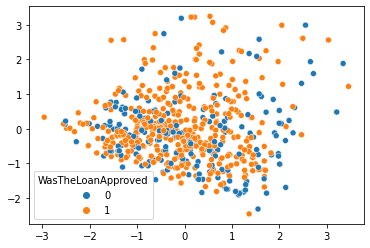

In [30]:
# 28. (1pts) Plot the Dimensions of the PCA Transformation

# Use sns.scatterplot to plot the PCA transformed training set
#   with the first column on the x-axis and the second column 
#   colored by the target y_train (using the hue parameter)
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue= y_train)

# Note that the data categories are still very mixed.
# Our models will have a difficult time with the data as is.
# Additional features and feature engineering would be needed for this task.